# Loan Prediction

## Problem Statement

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

## Hypothesis 

Below are some factors which can affect the Loan Approval:

1. Salary: Applicants with high income should have more chances of loan approval.
2. Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
3. Loan Amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval is high.
4. Loan term: Loan of less time period and less amount should have higher chances of approval.
5. EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval. 

In [1]:
#importing required the libraries
import pandas as pd                
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings                     # to ignore warning 
warnings.filterwarnings("ignore")

#reading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_org = train.copy()
test_org = test.copy()

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [5]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

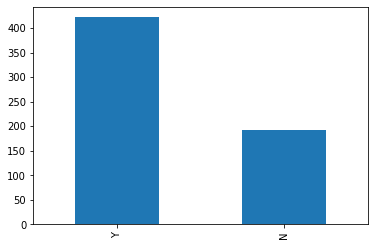

In [6]:
train['Loan_Status'].value_counts().plot.bar()

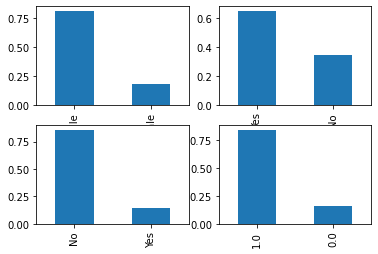

In [7]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar()
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar()
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar()
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar()
plt.show()

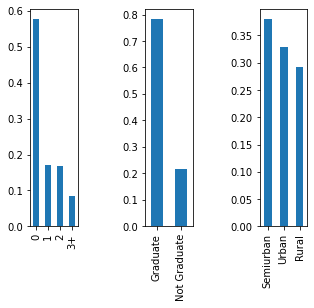

In [8]:
plt.figure(1)
plt.subplot(161)
train['Dependents'].value_counts(normalize=True).plot.bar()
plt.subplot(163)
train['Education'].value_counts(normalize=True).plot.bar()
plt.subplot(165)
train['Property_Area'].value_counts(normalize=True).plot.bar()
plt.show()

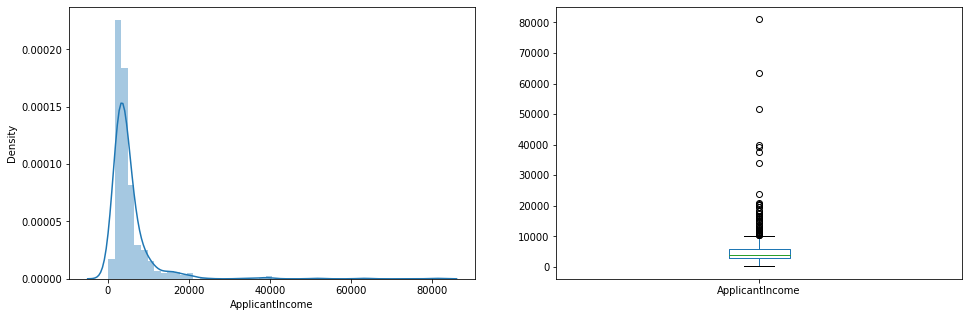

In [9]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

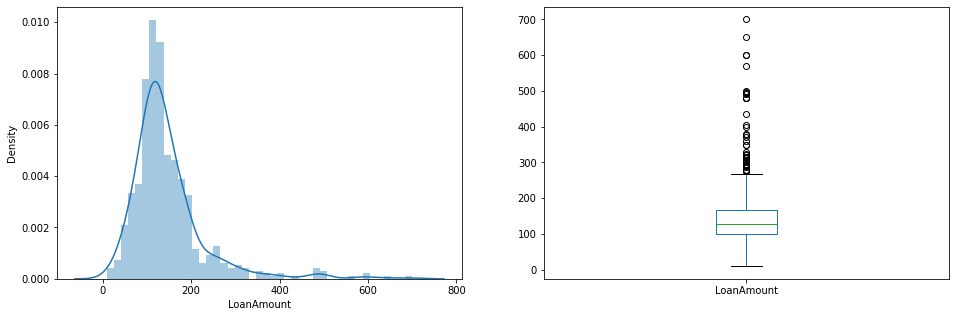

In [10]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:xlabel='Gender'>

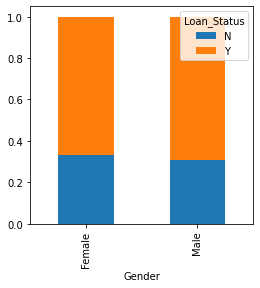

In [11]:
gender = pd.crosstab(train['Gender'],train['Loan_Status'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked = "True", figsize=(4,4))

<AxesSubplot:xlabel='Married'>

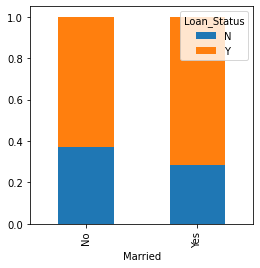

In [12]:
married = pd.crosstab(train['Married'],train['Loan_Status'])
married.div(married.sum(1).astype(float), axis=0).plot(kind="bar", stacked = "True", figsize=(4,4))

<AxesSubplot:xlabel='Dependents'>

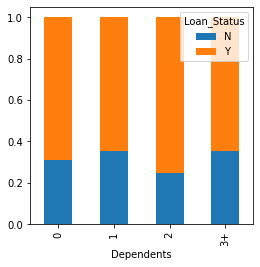

In [13]:
dependent = pd.crosstab(train['Dependents'],train['Loan_Status'])
dependent.div(dependent.sum(1).astype(float), axis=0).plot(kind="bar", stacked = "True", figsize=(4,4))

<AxesSubplot:xlabel='Self_Employed'>

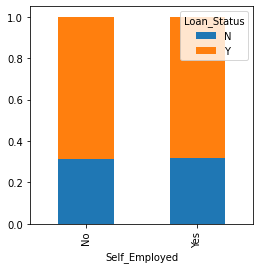

In [14]:
selfemplyd = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
selfemplyd.div(selfemplyd.sum(1).astype(float), axis=0).plot(kind="bar", stacked = "True", figsize=(4,4))

<AxesSubplot:xlabel='Credit_History'>

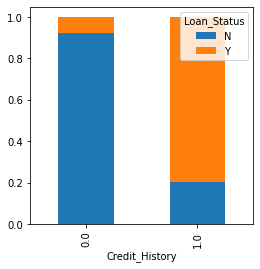

In [15]:
credith = pd.crosstab(train['Credit_History'],train['Loan_Status'])
credith.div(credith.sum(1).astype(float), axis=0).plot(kind="bar", stacked = "True", figsize=(4,4))

<AxesSubplot:xlabel='Property_Area'>

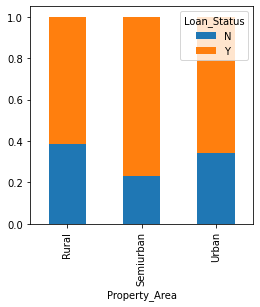

In [16]:
prop = pd.crosstab(train['Property_Area'],train['Loan_Status'])
prop.div(prop.sum(1).astype(float), axis=0).plot(kind="bar", stacked = "True", figsize=(4,4))

<AxesSubplot:xlabel='LoanAmount_bins'>

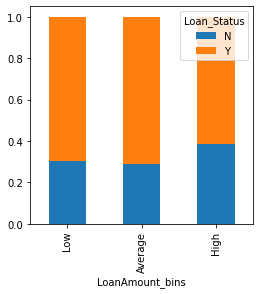

In [17]:
bins = [0,100,200,700]
groups = ['Low','Average','High']
train['LoanAmount_bins'] = pd.cut(train['LoanAmount'],bins,labels=groups)
loan_am = pd.crosstab(train['LoanAmount_bins'],train['Loan_Status'])
loan_am.div(loan_am.sum(1).astype(float), axis=0).plot(kind="bar", stacked = "True", figsize=(4,4))

<AxesSubplot:xlabel='TotalIncome_bins'>

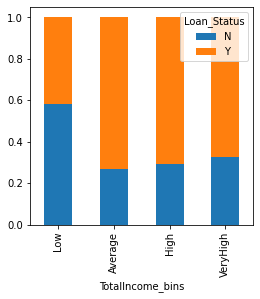

In [18]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
groups = ['Low','Average','High','VeryHigh']
train['TotalIncome_bins'] = pd.cut(train['Total_Income'],bins,labels=groups)
loan_am = pd.crosstab(train['TotalIncome_bins'],train['Loan_Status'])
loan_am.div(loan_am.sum(1).astype(float), axis=0).plot(kind="bar", stacked = "True", figsize=(4,4))

In [19]:
train = train.drop(['LoanAmount_bins','TotalIncome_bins'],axis=1)

train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

<AxesSubplot:>

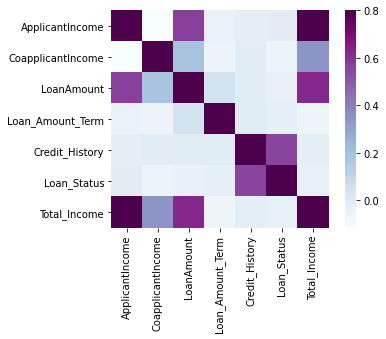

In [20]:
matrix = train.corr()
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu")

In [21]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [22]:
train['Gender'].fillna(train.Gender.mode()[0], inplace=True)
train['Married'].fillna(train.Married.mode()[0], inplace=True)
train['Dependents'].fillna(train.Dependents.mode()[0], inplace=True)
train['Self_Employed'].fillna(train.Self_Employed.mode()[0], inplace=True)
train['Credit_History'].fillna(train.Credit_History.mode()[0], inplace=True)

In [23]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [24]:
train['Loan_Amount_Term'].fillna(train.Loan_Amount_Term.mode()[0], inplace=True)
train['LoanAmount'].fillna(train.LoanAmount.mode()[0], inplace=True)

In [25]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

<AxesSubplot:>

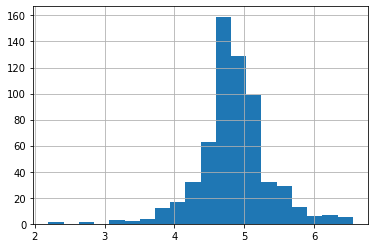

In [26]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

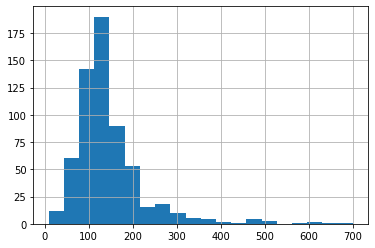

In [27]:
train['LoanAmount'].hist(bins=20)

In [28]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

X = train.drop('Loan_Status',axis = 1)
y = train.Loan_Status

In [29]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.3)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [31]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8162162162162162

In [32]:
test.isnull().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  5
Loan_Amount_Term            6
Credit_History             29
Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Dependents_3                0
Dependents_0                0
Dependents_1                0
Dependents_2                0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [33]:
test['LoanAmount'].fillna(test.LoanAmount.mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test.LoanAmount.mode()[0], inplace=True)
test['Credit_History'].fillna(test.Credit_History.mode()[0], inplace=True)
test.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_3               0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [37]:
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [38]:
pred_test = model.predict(test)
submission = pd.read_csv('sample_submission_49d68Cx.csv')

In [39]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_org['Loan_ID']

submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [41]:
pd.DataFrame(submission, columns = ['Loan_ID','Loan_Status']).to_csv('log.csv')

In [44]:
from sklearn.model_selection import StratifiedKFold

i = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    pred_acc = accuracy_score(yvl,pred_test)
    print('accuracy_score',pred_acc)
    i+=1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


0 of kfold5
accuracy_score 0.8048780487804879

1 of kfold5
accuracy_score 0.6910569105691057

2 of kfold5
accuracy_score 0.7804878048780488

3 of kfold5
accuracy_score 0.7886178861788617

4 of kfold5
accuracy_score 0.8032786885245902


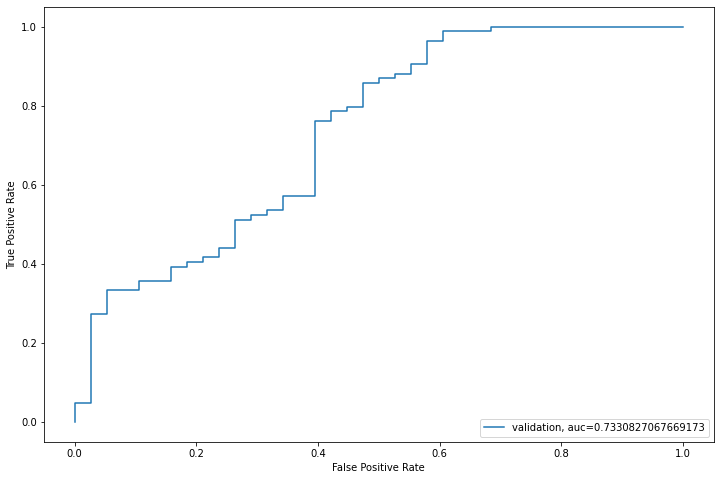

In [47]:
from sklearn import metrics
fpr,tpr,_ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

<AxesSubplot:xlabel='Total_income_log', ylabel='Density'>

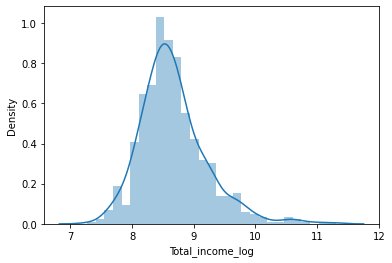

In [50]:
train['Total_income_log'] = np.log(train['Total_Income'])
test['Total_income_log'] = np.log(test['Total_Income'])
sns.distplot(train['Total_income_log'])

<AxesSubplot:xlabel='EMI', ylabel='Density'>

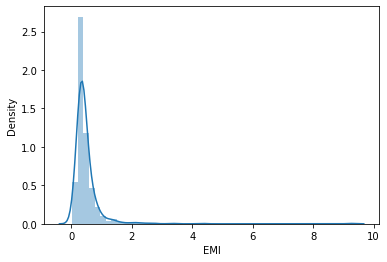

In [53]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI'])

<AxesSubplot:xlabel='Balance_income', ylabel='Density'>

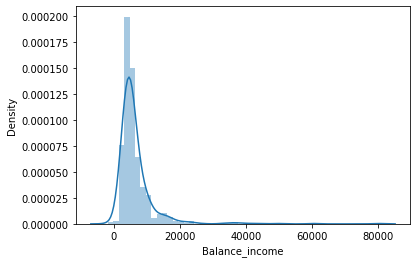

In [54]:
train['Balance_income'] = train['Total_Income'] - (train['EMI']*1000)
test['Balance_income'] = test['Total_Income'] - (test['EMI']*1000)
sns.distplot(train['Balance_income'])

In [58]:
train = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Credit_History           614 non-null    float64
 1   Loan_Status              614 non-null    int64  
 2   Total_Income             614 non-null    float64
 3   LoanAmount_log           614 non-null    float64
 4   Gender_Female            614 non-null    uint8  
 5   Gender_Male              614 non-null    uint8  
 6   Married_No               614 non-null    uint8  
 7   Married_Yes              614 non-null    uint8  
 8   Dependents_3             614 non-null    uint8  
 9   Dependents_0             614 non-null    uint8  
 10  Dependents_1             614 non-null    uint8  
 11  Dependents_2             614 non-null    uint8  
 12  Education_Graduate       614 non-null    uint8  
 13  Education_Not Graduate   614 non-null    uint8  
 14  Self_Employed_No         6

In [60]:
X = train.drop('Loan_Status',axis = 1)
y = train.Loan_Status

In [62]:
from sklearn.tree import DecisionTreeClassifier

i = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    pred_acc = accuracy_score(yvl,pred_test)
    print('accuracy_score',pred_acc)
    i+=1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


0 of kfold5
accuracy_score 0.7642276422764228

1 of kfold5
accuracy_score 0.6422764227642277

2 of kfold5
accuracy_score 0.7317073170731707

3 of kfold5
accuracy_score 0.7154471544715447

4 of kfold5
accuracy_score 0.6639344262295082


In [63]:
from sklearn.ensemble import RandomForestClassifier

i = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = RandomForestClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    pred_acc = accuracy_score(yvl,pred_test)
    print('accuracy_score',pred_acc)
    i+=1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


0 of kfold5
accuracy_score 0.8292682926829268

1 of kfold5
accuracy_score 0.8048780487804879

2 of kfold5
accuracy_score 0.8130081300813008

3 of kfold5
accuracy_score 0.8048780487804879

4 of kfold5
accuracy_score 0.7622950819672131


In [64]:
from sklearn.model_selection import GridSearchCV

x_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size=0.2, random_state=1)

paramgrid = {
    'max_depth' : list(range(1,20,2)),
    'n_estimators' : list(range(1,200,2))
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

grid_search.fit(x_train,y_train)


GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39,
                                          41, 43, 45, 47, 49, 51, 53, 55, 57,
                                          59, ...]})

In [65]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=7, random_state=1)

In [75]:
i = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = RandomForestClassifier(max_depth=3, n_estimators=7, random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    pred_acc = accuracy_score(yvl,pred_test)
    print('accuracy_score',pred_acc)
    i+=1
pred_test = model.predict(test)
pred = model.predict_proba(test)[:,1]


0 of kfold5
accuracy_score 0.8455284552845529

1 of kfold5
accuracy_score 0.8373983739837398

2 of kfold5
accuracy_score 0.7317073170731707

3 of kfold5
accuracy_score 0.7886178861788617

4 of kfold5
accuracy_score 0.7704918032786885


In [78]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')
submission['Loan_ID'] = test_org['Loan_ID']
submission['Loan_Status'] = pred_test
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('randomforest.csv',index=False)

<AxesSubplot:>

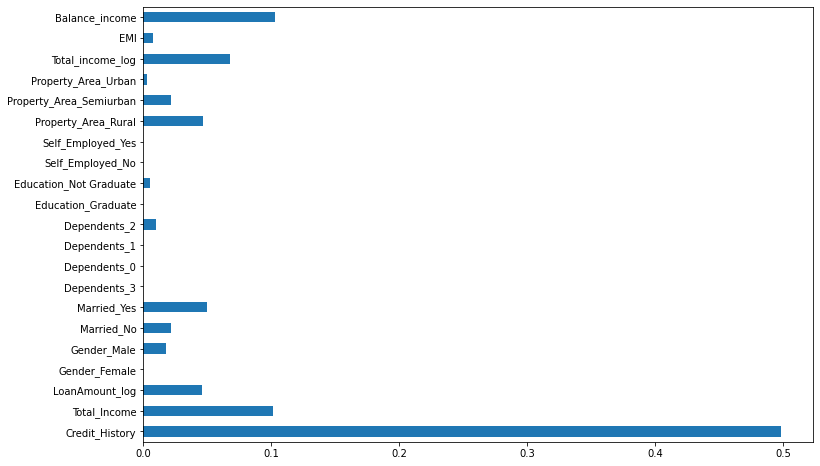

In [70]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.plot(kind='barh', figsize=(12,8))